In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
#loading the data
data = pd.read_csv('ex2data2.txt', names=['First Test', 'Second Test', 'Acceptance'])

#splitting the data (splitting the features from the target)
x_data = np.array(data.drop(['Acceptance'], axis=1).values)
y_data = np.array(data['Acceptance'].values).reshape(len(x_data), 1)

#formating the data to make it able to plot
class_zero = []
class_one = []

for index, y in enumerate(y_data):
    if y[0] == 0:
        class_zero.append(x_data[index])
    else: class_one.append(x_data[index])
        
class_one = np.array(class_one)
class_zero = np.array(class_zero)

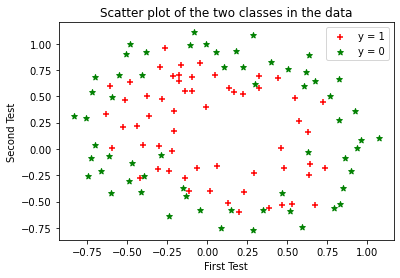

In [78]:
#ploting the data
plt.title('Scatter plot of the two classes in the data')
plt.xlabel('First Test')
plt.ylabel('Second Test')
plt.scatter(class_one[:,0], class_one[:, 1], color='red', marker='+', label='y = 1')
plt.scatter(class_zero[:,0], class_zero[:, 1], color='green', marker='*', label='y = 0')
plt.legend()

In [79]:
#feature mapping
def map_feature(x_data, power):
    features = np.ones(len(x_data)).reshape(len(x_data), 1)
    for n in range(1, power + 1):
        for i in range(0, n + 1):
            x1 = x_data[:, 0]
            x2 = x_data[:, 1]
            term = np.array((x1 ** (n - i)) * (x2 ** (i))).reshape(len(x_data), 1)
            features = np.hstack((features, term))
            
    return features

In [80]:
#generating the new x_data with all the new features
x_data = map_feature(x_data, 6)

In [81]:
#creating some utility functions
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

def h(x_data, theta):
    z = np.dot(x_data, theta)
    return sigmoid(z)

def cost_function(x_data, y_data, theta, Lambda):
    first_part = -np.dot(y_data.T, np.log(h(x_data, theta)))
    second_part = -np.dot((1 - y_data).T, np.log(1 - h(x_data, theta)))
    third_part = (Lambda / (2*len(x_data))) * (np.vstack((np.array([0]), theta[1:])) ** 2).sum()
    total_cost = first_part + second_part + third_part
    
    return total_cost.sum() / len(x_data)

def gradient_descent(x_data, y_data, theta, learning_rate, Lambda):
    err = h(x_data, theta) - y_data
    dtheta = np.dot(x_data.T, err) + Lambda * (np.vstack((np.array([0]), theta[1:])))
    theta = theta - learning_rate * dtheta
    
    return theta

In [82]:
#creating the training function
def train_model(x_data, y_data, theta, learning_rate, nbr_iter, Lambda):
    cost = []
    for i in range(nbr_iter):
        cost.append(cost_function(x_data, y_data, theta, Lambda))
        theta = gradient_descent(x_data, y_data, theta, learning_rate, Lambda)
        
    return theta, cost

In [83]:
#training the model
initial_theta = np.zeros([28, 1])
Lambda = 1
learning_rate = 0.002
nbr_iter = 1500

theta, cost = train_model(x_data, y_data, initial_theta, learning_rate, nbr_iter, Lambda)

theta

array([[ 1.26236311],
       [ 0.61970146],
       [ 1.17530142],
       [-2.0047996 ],
       [-0.90289293],
       [-1.40322385],
       [ 0.12245163],
       [-0.36401878],
       [-0.35872169],
       [-0.1747645 ],
       [-1.45414876],
       [-0.05733912],
       [-0.61195752],
       [-0.27039605],
       [-1.18841242],
       [-0.24118286],
       [-0.20744524],
       [-0.0501789 ],
       [-0.27489106],
       [-0.29298384],
       [-0.46589773],
       [-1.04199539],
       [ 0.02243842],
       [-0.29197535],
       [ 0.0118124 ],
       [-0.32547466],
       [-0.14109593],
       [-0.9340739 ]])

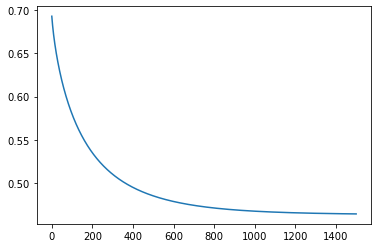

In [84]:
#plot the cost function
x = np.arange(nbr_iter)
plt.plot(x, cost)

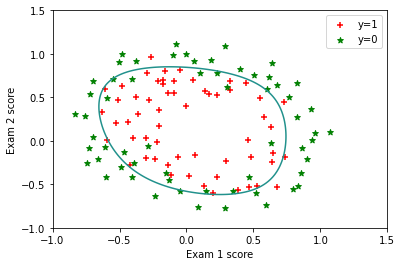

In [85]:
#ploting the model
def mapFeaturePlot(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

#ploting the data
plt.scatter(class_one[:,0], class_one[:, 1], color='red', marker='+', label='y=1')
plt.scatter(class_zero[:,0], class_zero[:, 1], color='green', marker='*', label='y=0')

#ploting the decision boundry
u_vals = np.linspace(-1,1.5,150)
v_vals= np.linspace(-1,1.5,150)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta 

plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

In [86]:
#creating the prediction function
def predict_admission(first_score, second_score):
    probabilities = {}
    x_data = map_feature(np.array([[first_score, second_score]]), 6)
    
    probabilities['Pass Probability'] = h(x_data, theta)[0][0]
    probabilities['Fail Probability'] = 1 - h(x_data, theta)[0][0]
    
    return probabilities

In [87]:
#making some predictions and making sure if the model is working right
print("For a microship with test scores -0.25 and 1.5: ", predict_admission(-0.25,1.5))
print("For a microship with test scores 0 and 0: ", predict_admission(0, 0))
print("For a microship with test scores 0.5 and 0.5: ", predict_admission(0.5, 0.5))
print("For a microship with test scores -0.25 and 0.25: ", predict_admission(-0.25, 0.25))
print("For a microship with test scores 0.25 and 0.25: ", predict_admission(0.25, 0.25))
print("For a microship with test scores 0.5 and 1: ", predict_admission(0.5, 1))
print("For a microship with test scores 1 and 0.5: ", predict_admission(1, 0.5))
print("For a microship with test scores 1 and 1: ", predict_admission(1, 1))

For a microship with test scores -0.25 and 1.5:  {'Pass Probability': 1.9048956568916075e-09, 'Fail Probability': 0.9999999980951043}
For a microship with test scores 0 and 0:  {'Pass Probability': 0.7794326359188095, 'Fail Probability': 0.2205673640811905}
For a microship with test scores 0.5 and 0.5:  {'Pass Probability': 0.6617889553419973, 'Fail Probability': 0.33821104465800267}
For a microship with test scores -0.25 and 0.25:  {'Pass Probability': 0.7733930666018, 'Fail Probability': 0.22660693339820004}
For a microship with test scores 0.25 and 0.25:  {'Pass Probability': 0.8043051598448865, 'Fail Probability': 0.19569484015511351}
For a microship with test scores 0.5 and 1:  {'Pass Probability': 0.031096807332469712, 'Fail Probability': 0.9689031926675303}
For a microship with test scores 1 and 0.5:  {'Pass Probability': 0.02148616595243834, 'Fail Probability': 0.9785138340475616}
For a microship with test scores 1 and 1:  {'Pass Probability': 5.307233717895095e-05, 'Fail Proba